In [3]:
#!pip install cognite-sdk
!pip install --upgrade cognite-sdk

  Attempting uninstall: cognite-sdk
    Found existing installation: cognite-sdk 2.29.0
    Uninstalling cognite-sdk-2.29.0:
      Successfully uninstalled cognite-sdk-2.29.0


In [2]:
%matplotlib inline

import os
from datetime import datetime, timedelta
from datetime import datetime
from getpass import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from cognite.client import CogniteClient

In [3]:
c = CogniteClient(api_key=getpass("Open Industrial Data API-KEY: "),
                       project="publicdata", client_name="Tamas Suli")

Open Industrial Data API-KEY: ········


In [4]:
all_timeseries = c.time_series.list(limit=-1).to_pandas()
print(len(all_timeseries))
all_timeseries[:20]

408


,id,externalId,name,isString,metadata,assetId,isStep,description,createdTime,lastUpdatedTime,unit
0,6190956317771,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'tag': 'VAL_23-PDT-92501:X.Value', 'scan': '1...",5552927149248373,False,PH 1stStgSuctCool Gas In ESDV,1593024714298,1593512847807,NaN
1,12378169571900,pi:161021,VAL_23-YA-96118-02:Z.X.Value,False,"{'tag': 'VAL_23-YA-96118-02:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear1 Journ BRG NDE,1593024714298,1593512902300,NaN
2,25870989735584,pi:160252,VAL_23-KA-9101-M01_OC_low stage_NOC3low:VALUE,False,{'tag': 'VAL_23-KA-9101-M01_OC_low stage_NOC3l...,6191827428964450,False,PH (SwitchGear) MV-COMP.M. FEEDER/ 51-protecti...,1593024714298,1593512810583,NaN
3,36109712494634,houston.ro.REMOTE_AI[27],FIT85-27,False,"{'PLC': 'ro', 'type': 'Flow Meter', 'P&ID No':...",5429456298475824,False,Flow Rate Permeate Pass 2,1594038832212,1594038977936,gpm
4,52336799167961,pi:160731,VAL_23-PT-96186:Z.X1.Value,False,"{'tag': 'VAL_23-PT-96186:Z.X1.Value', 'scan': ...",4499548129923245,False,PH 1st Stg Oil Header,1593024714298,1593512866556,NaN
5,54795035045033,pi:160031,VAL_23_FIC_92543_02:Z.X.Value,False,"{'tag': 'VAL_23_FIC_92543_02:Z.X.Value', 'scan...",7738334214915176,False,PH 1stStgComp AntSrg Act CntrlMod,1593024714298,1593512911434,NaN
6,62243813742212,pi:161024,VAL_23-YA-96120-01:Z.X.Value,False,"{'tag': 'VAL_23-YA-96120-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear2 Journ BRG DE,1593024714298,1593512903356,NaN
7,75475333173539,pi:160920,VAL_23-TT-96115-01:Z.X.Value,False,"{'tag': 'VAL_23-TT-96115-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear Thrust BRG IN,1593024714298,1593512891075,NaN
8,75873560338797,pi:160574,VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE,False,{'tag': 'VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE...,1081261865374641,False,PH (Profiler) Shutdown Channel 0 - Tube y Setp...,1593024714298,1593512840510,NaN
9,138649441615650,pi:160061,VAL_23_FT_92537_03:Z.X.Value,False,"{'tag': 'VAL_23_FT_92537_03:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStgComp Flow,1593024714298,1593512914895,NaN


In [5]:
c.datapoints.retrieve(id=384300500341710, start="600d-ago", end="now").to_pandas().head()

,pi:160566
2020-08-05 15:51:18.020,10000.0
2020-08-05 16:01:18.020,10000.0
2020-08-05 16:11:18.020,10000.0
2020-08-05 16:21:18.020,10000.0
2020-08-05 16:31:18.020,10000.0


In [6]:
c.datapoints.retrieve(external_id="VAL_23-LY-92529_Setpoints_SP_waterHi:VALUE", start="600d-ago", end="now").to_pandas().head()

CogniteAPIError: Time series ids not found | code: 400 | X-Request-ID: 999c7d3b-dc03-9144-90b8-26f2292cc794
Missing: [{'externalId': 'VAL_23-LY-92529_Setpoints_SP_waterHi:VALUE'}]

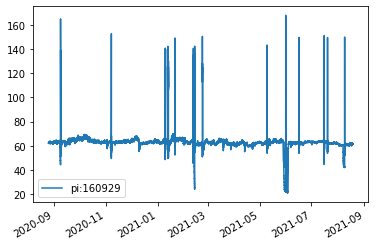

In [7]:
my_time_series = c.time_series.retrieve(id=944003029648139)
my_time_series.plot(start="365d-ago", end="now")